In [2]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

In [4]:
def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

def color_analysis(img, num_of_colors = 5):
    clf = KMeans(n_clusters = num_of_colors)
    clf.fit(img)
    center_colors = clf.cluster_centers_.round().astype('int')
    counts = Counter(clf.labels_)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize = (12, 8))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig("color_analysis_report.png")
    print(hex_colors)

In [5]:
image = cv2.imread("data/interiers/inter_1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

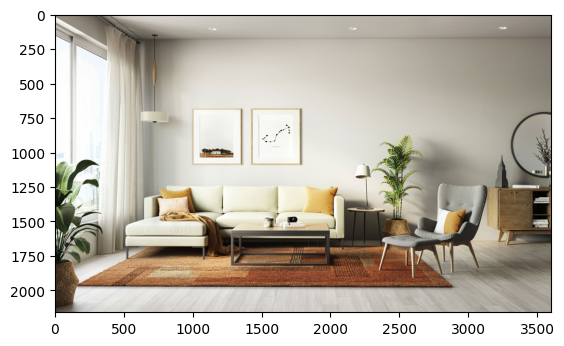

In [6]:
plt.imshow(image)

['#aaa291', '#5a4633', '#e2e0d8']


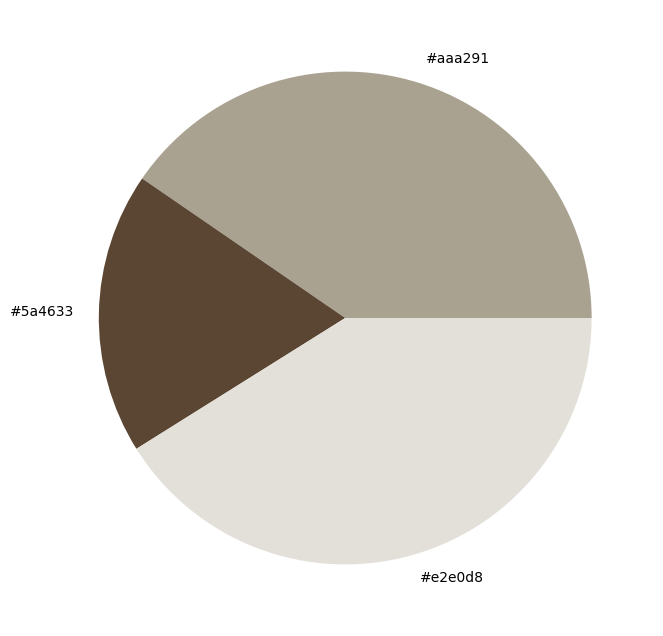

In [8]:
modified_image = prep_image(image)
color_analysis(modified_image, 3)


In [151]:
modified_image = prep_image(image)
num_of_colors = 6
clf = KMeans(n_clusters = num_of_colors)
clf.fit(modified_image)

KMeans(n_clusters=6)

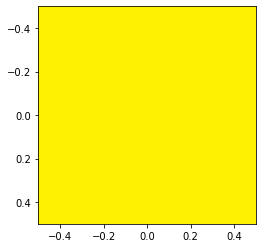

In [157]:
plt.imshow([[clf.cluster_centers_.round().astype('int')[1]]])

In [163]:
pd.DataFrame.from_dict(dict(Counter(clf.labels_)),orient='index').reset_index()

,index,0
0,1,270600
1,2,136200
2,4,33053
3,3,69000
4,0,27575
5,5,3572


In [12]:
shtora_db = {
    "shtora1": {
        "id": 1,
        "file_name": "real_shtora_1.png",
        "colors": [
            ['#e2e0d8' ,18.49],
            ['#aaa291' ,41.09],
            ['#5a4633' ,40.42]
        ]
    },
    "shtora2": {
        "id": 1,
        "file_name": "real_shtora_1.png",
        "colors": [
            ['#e2e0d8' ,18.49],
            ['#aaa291' ,41.09],
            ['#5a4633' ,40.42]
        ]
    }
}

In [13]:
shtora_db['shtora1']['colors']

[['#e2e0d8', '18.49'], ['#aaa291', '41.09'], ['#5a4633', '40.42']]